Step 19


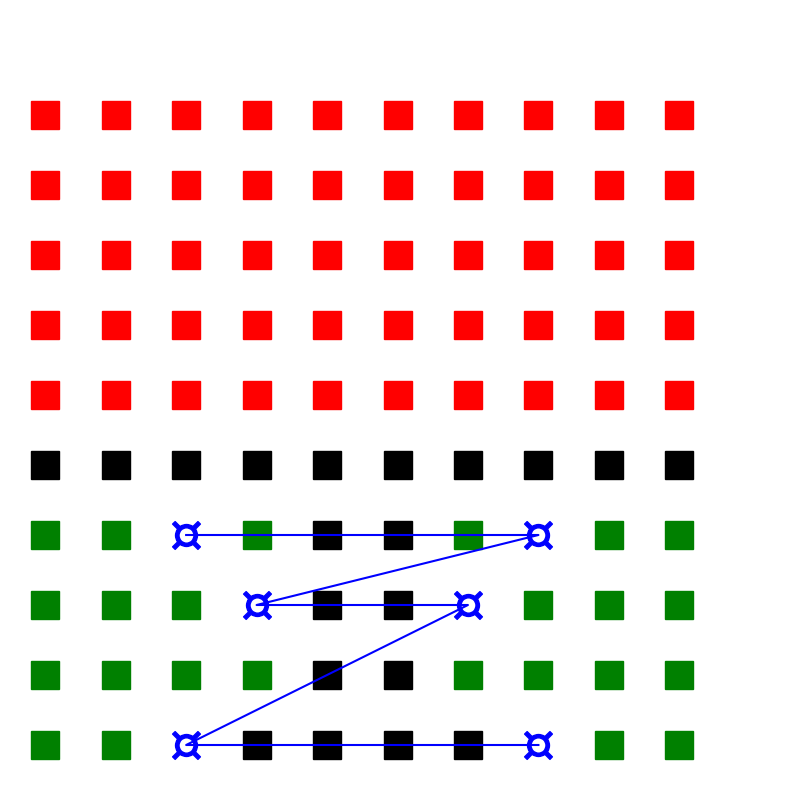

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output

# Step 1: Create the forest with T-road, fireproof zone, top trees, and houses
forest = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],  # horizontal road
    [3, 3, 22, 3, 4, 4, 3, 22, 3, 3],
    [3, 3, 3, 22, 4, 4, 22, 3, 3, 3],
    [3, 3, 3, 3, 4, 4, 3, 3, 3, 3],
    [3, 3, 22, 4, 4, 4, 4, 22, 3, 3]
])

# Step 2: Randomly ignite trees in the top row
for col in range(forest.shape[1]):
    if forest[0, col] == 1 and random.random() < 0.2:
        forest[0, col] = 2

# Step 3: Fire spread step logic with persistent fire display

def step_forest(forest):
    new_forest = forest.copy()
    N = forest.shape[0]

    for i in range(N):
        for j in range(N):
            cell = forest[i, j]

            if cell == 2:
                new_forest[i, j] = 5  # continue burning
            elif cell == 5:
                new_forest[i, j] = 6  # still burning
            elif cell == 6:
                new_forest[i, j] = 6  # persist as burned fire visually

            # Spread fire only from newest igniters
            if cell == 2:
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        ni, nj = i + dx, j + dy
                        if (0 <= ni < N) and (0 <= nj < N) and (dx != 0 or dy != 0):
                            if forest[ni, nj] == 1:
                                new_forest[ni, nj] = 2

    return new_forest

# Step 4: Visualize with symbols

def plotgrid(myarray):
    fig = plt.figure(figsize=(10, 10))

    x_range = np.linspace(0, myarray.shape[1] - 1, myarray.shape[1])
    y_range = np.linspace(0, myarray.shape[0] - 1, myarray.shape[0])
    x_indexes, y_indexes = np.meshgrid(x_range, y_range)

    tr_x = x_indexes[myarray == 1]
    tr_y = y_indexes[myarray == 1]
    sq_x = x_indexes[myarray == 2]
    sq_y = y_indexes[myarray == 2]
    fire5_x = x_indexes[myarray == 5]
    fire5_y = y_indexes[myarray == 5]
    fire6_x = x_indexes[myarray == 6]
    fire6_y = y_indexes[myarray == 6]
    safe_x = x_indexes[myarray == 3]
    safe_y = y_indexes[myarray == 3]
    road_x = x_indexes[myarray == 4]
    road_y = y_indexes[myarray == 4]
    house_x = x_indexes[myarray == 22]
    house_y = y_indexes[myarray == 22]

    plt.plot(tr_x, myarray.shape[0] - tr_y - 1, '^g', markersize=20)
    plt.plot(sq_x, myarray.shape[0] - sq_y - 1, 'yo', markersize=20)
    plt.plot(fire5_x, myarray.shape[0] - fire5_y - 1, 'ro', markersize=20)
    plt.plot(fire6_x, myarray.shape[0] - fire6_y - 1, 'rs', markersize=20)
    plt.plot(safe_x, myarray.shape[0] - safe_y - 1, 'gs', markersize=20)
    plt.plot(road_x, myarray.shape[0] - road_y - 1, 'ks', markersize=20)
    plt.plot(house_x, myarray.shape[0] - house_y - 1, marker='$\U0001F3E0$', color='blue', markersize=20)  # 🏠

    plt.ylim([-0.5, myarray.shape[0] + 0.5])
    plt.xlim([-0.5, myarray.shape[1] + 0.5])
    plt.axis('off')
    plt.show()

# Step 5: Run the simulation
for t in range(20):
    clear_output(wait=True)
    print(f"Step {t}")
    plotgrid(forest)
    forest = step_forest(forest)
    time.sleep(0.5)
